In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
movies_path = '/Users/mehul.chopra/Downloads/data-analysis-data/movielens/movies.dat'

In [3]:
mdf = pd.read_csv(movies_path, sep='::', header=None, names=['movie_id','title','genres'])
mdf

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
users_path = '/Users/mehul.chopra/Downloads/data-analysis-data/movielens/users.dat'
udf = pd.read_csv(users_path, sep='::', header=None, names=['user_id','gender','age','occupation','zipcode'])
udf

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [7]:
ratings_path = '/Users/mehul.chopra/Downloads/data-analysis-data/movielens/ratings.dat'
rdf = pd.read_csv(ratings_path, sep='::', header=None, names=['user_id','movie_id','ratings','timestamp'])
rdf

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [10]:
d1 = pd.merge(pd.merge(rdf, udf), mdf)
d1

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zipcode,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


Popular movies
All movies that have more than 500 ratings

In [33]:
d2 = d1['title']
d3 = d2.value_counts()
d4 = d3[d3 > 500]
d4

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [34]:
d5 = d1[['title','gender','ratings']]
d6 = d5.pivot_table('ratings', aggfunc='mean', index='title', columns=['gender'])
d7 = d6.loc[d4.index]
d8 = d7.sort_values(by='F', ascending=False)
d9 = d8.head(10)
d9

gender,F,M
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
To Kill a Mockingbird (1962),4.536667,4.372611
"Usual Suspects, The (1995)",4.513317,4.518248
Rear Window (1954),4.484536,4.472991
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Sixth Sense, The (1999)",4.477410,4.379944
Some Like It Hot (1959),4.462745,4.228769


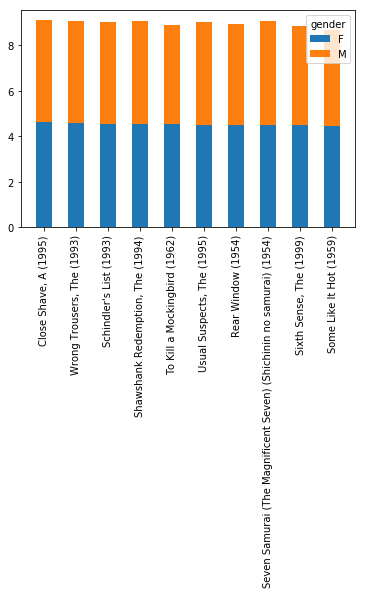

In [41]:
d9.plot(kind='bar', stacked=True)
plt.autoscale()
plt.savefig('/Users/mehul.chopra/Downloads/data-analysis-data/mean_ratings.jpg', format='jpg')

In [32]:
d7['diff'] = d7['M'] - d7['F']
d8 = d7.sort_values(by='diff', ascending=False)
d8

gender,F,M,diff
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
Dumb & Dumber (1994),2.697987,3.336595,0.638608
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Caddyshack (1980),3.396135,3.969737,0.573602
Animal House (1978),3.628906,4.167192,0.538286
"Exorcist, The (1973)",3.537634,4.067239,0.529605
Big Trouble in Little China (1986),2.987952,3.485030,0.497078
From Dusk Till Dawn (1996),2.735714,3.232558,0.496844
"Me, Myself and Irene (2000)",2.629310,3.096847,0.467537
Kingpin (1996),3.092308,3.557480,0.465173
